In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_dir = '/content/drive/My Drive/Colab Notebooks/taxi_cleaned_2014.csv'
#path = 'drive/My Drive/MIE368 Project/data/taxi_cleaned.csv'
df = pd.read_csv(data_dir, header = 0)

In [0]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,duration,time_of_day
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90,426,4.0
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40,540,4.0
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00,899,4.0
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20,403,4.0
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75,383,4.0


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.drop(columns=['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','payment_type','vendor_id', 'pickup_datetime', 'dropoff_datetime','total_amount','mta_tax']), df['tip_amount'], test_size=0.30, random_state=5)

# Feature Engineering

##Visualizing continuous variables

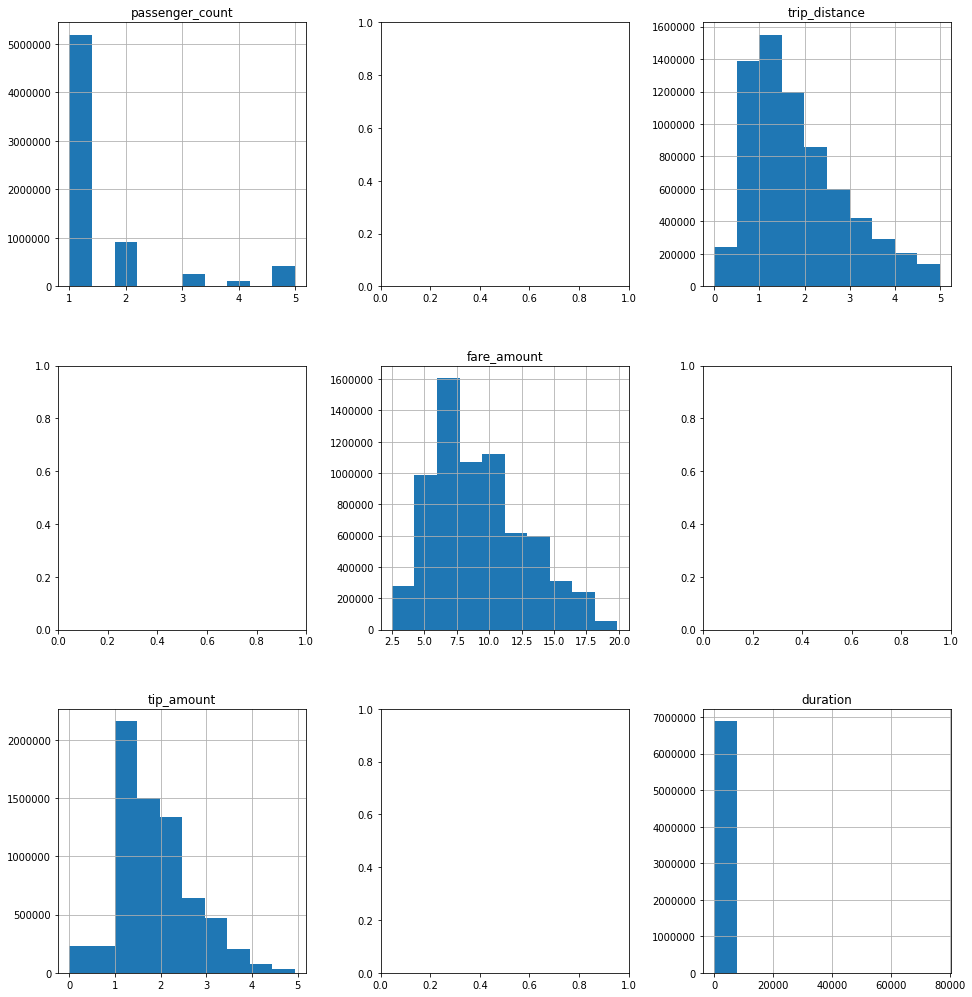

In [0]:
continuous_variables = ['passenger_count', 'trip_distance', 
                        'fare_amount', 'tip_amount', 'duration']

fig, ax = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(bottom=0.4, top=1.5)
ax = ax.ravel()

for i, col in enumerate(continuous_variables):
  df.hist(col, ax = ax[2*i])

In [0]:
df2 = df.copy()
df2["duration"] = df2["duration"]/60
df2.head()



,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,duration,time_of_day
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90,7.100000,4.0
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40,9.000000,4.0
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00,14.983333,4.0
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20,6.716667,4.0
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75,6.383333,4.0


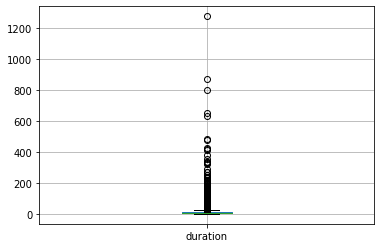

In [0]:
df2.boxplot(column = "duration")

10.233004974080652
9.1
5.620103470405836


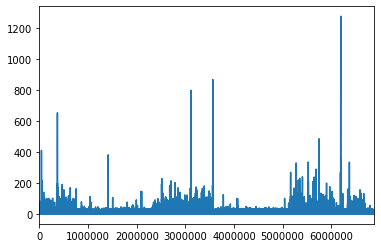

In [0]:
print(df2["duration"].mean())
print(df2["duration"].median())
print(df2["duration"].std())
df2["duration"].plot(kind = "line")

From the above visualization it can be seen that features have varying values of different orders of magnitudes. 
Perform log transform, may not need to normalize

In [0]:
df3 = df2.copy()
data = pd.get_dummies(df3, prefix=['time_of_day'], columns=['time_of_day'])
data2 =pd.get_dummies(df3, prefix=['passenger_count'], columns=['passenger_count']) 

temp = df3['time_of_day']
temp = pd.get_dummies(temp,prefix=['time_of_day'])
df3 = pd.concat([df3, temp])

temp2 = df3["passenger_count"]
temp2 = pd.get_dummies(temp2,prefix=['passenger_count'])
df3 = pd.concat([df3, temp2])

In [0]:
df3.head()

,['passenger_count']_1.0,['passenger_count']_2.0,['passenger_count']_3.0,['passenger_count']_4.0,['passenger_count']_5.0,['time_of_day']_1.0,['time_of_day']_2.0,['time_of_day']_3.0,['time_of_day']_4.0,['time_of_day']_5.0,['time_of_day']_6.0,dropoff_datetime,dropoff_latitude,dropoff_longitude,duration,fare_amount,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,surcharge,time_of_day,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-09 20:52:31,40.731790,-73.982227,7.100000,6.5,0.5,1.0,CRD,2014-01-09 20:45:25,40.736828,-73.994770,0.5,4.0,1.40,0.0,8.90,0.7,CMT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-09 20:55:12,40.763995,-73.960449,9.000000,8.5,0.5,1.0,CRD,2014-01-09 20:46:12,40.773382,-73.982392,0.5,4.0,1.90,0.0,11.40,1.4,CMT
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-09 20:59:46,40.765217,-73.986626,14.983333,11.5,0.5,2.0,CRD,2014-01-09 20:44:47,40.739406,-73.988570,0.5,4.0,1.50,0.0,14.00,2.3,CMT
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-09 20:51:40,40.777050,-73.979863,6.716667,7.5,0.5,1.0,CRD,2014-01-09 20:44:57,40.770464,-73.960213,0.5,4.0,1.70,0.0,10.20,1.7,CMT
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-09 20:53:32,40.720524,-73.984367,6.383333,6.0,0.5,1.0,CRD,2014-01-09 20:47:09,40.717248,-73.995371,0.5,4.0,1.75,0.0,8.75,0.9,CMT


In [0]:
df2['trip_distance'] = np.log(df['trip_distance'])
df2['fare_amount'] = np.log(df['fare_amount'])
df2['duration'] = np.log(df['duration'])
df2['tip_amount'] = np.log(df['tip_amount'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
df2.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,duration,time_of_day
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,-0.356675,-73.994770,40.736828,-73.982227,40.731790,CRD,1.871802,0.5,0.5,0.336472,0.0,8.90,6.054439,4.0
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,0.336472,-73.982392,40.773382,-73.960449,40.763995,CRD,2.140066,0.5,0.5,0.641854,0.0,11.40,6.291569,4.0
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,0.832909,-73.988570,40.739406,-73.986626,40.765217,CRD,2.442347,0.5,0.5,0.405465,0.0,14.00,6.801283,4.0
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,0.530628,-73.960213,40.770464,-73.979863,40.777050,CRD,2.014903,0.5,0.5,0.530628,0.0,10.20,5.998937,4.0
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,-0.105361,-73.995371,40.717248,-73.984367,40.720524,CRD,1.791759,0.5,0.5,0.559616,0.0,8.75,5.948035,4.0


In [0]:
continuous_variables = ['passenger_count', 'trip_distance', 
                        'fare_amount', 'tip_amount', 'duration']

fig, ax = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(bottom=0.4, top=1.5)
ax = ax.ravel()

for i, col in enumerate(continuous_variables):
  df2.hist(col, ax = ax[2*i])

In [0]:
df2.isnull().sum()


vendor_id                 0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
trip_distance             0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
payment_type              0
fare_amount               0
surcharge                 0
mta_tax                   0
tip_amount                0
tolls_amount              0
total_amount              0
duration                  0
time_of_day          248940
dtype: int64

In [0]:
df2.max()

vendor_id                            VTS
pickup_datetime      2014-02-28 23:59:00
dropoff_datetime     2014-03-01 00:23:00
passenger_count                        5
trip_distance                    1.60744
pickup_longitude                 80.5439
pickup_latitude                  68.8138
dropoff_longitude                80.5439
dropoff_latitude                 404.083
payment_type                         UNK
fare_amount                      2.98971
surcharge                              1
mta_tax                              0.5
tip_amount                       1.59737
tolls_amount                         0.6
total_amount                       23.83
duration                         11.2447
time_of_day                            6
dtype: object

#Models

##CART

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.drop(columns=['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','payment_type','vendor_id', 'pickup_datetime', 'dropoff_datetime','total_amount','mta_tax']), df['tip_amount'], test_size=0.30, random_state=5)

In [0]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,duration,time_of_day
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90,426.0,4.0
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40,540.0,4.0
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00,899.0,4.0
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20,403.0,4.0
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75,383.0,4.0


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import SVG
from graphviz import Source

# Train the CART model
cart_model = DecisionTreeClassifier(random_state=3,max_depth=3)
cart_model.fit(X_train, y_train)
train_score = cart_model.score(X_train, y_train)
test_score = cart_model.score(X_test, y_test)

# Print out summary of model performance 
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

# Visualize the decision tree
cart_graph = Source(export_graphviz(cart_model,
                   feature_names = df.columns[1:],
                   rounded = True, proportion = False, 
                  filled = True))
SVG(cart_graph.pipe(format='svg'))

ValueError: ignored

##Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier


depths = [2, 3, 4, 5, 6, 7]
accuracy = pd.Series(index=depths)

for max_depth in depths:

    # Initialize the model
    rf_baseline_model = RandomForestClassifier(
        random_state = 0, 
        max_depth = max_depth,
        n_estimators = 50, max_features = 0.2
    )
    
    # Fit and train model
    print('For {} max_depth '.format(max_depth), end='')
    train_score, test_score = fit_and_score_model(rf_baseline_model, x_train, x_test, y_train, y_test)
    
    # Save model performance to dataframe
    cheat_scores.loc[max_depth] = test_score
    
print('\n***Best model has a score of {:.3f} with a max_depth of {}***'.format(cheat_scores.max(), cheat_scores.idxmax()))
